# Springboard Data Science Boot Camp - Data Storytelling Project: Adult Income

## Objectives:

- Briefly explore the data and perform what cleaning is necessary.
    - look for NaN, Datatypes, and drop/impute data as seems pertinent
- More thoroughly explore the data and formulate a story around it.
    - histograms
    - barcharts
    - heatmaps
    - boxplots
    - scatterplots
    - pairplot
    - etc.
    - Question the data:
        - Can I count something interesting?
        - Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
        - Can I make a bar plot or a histogram?
        - Can I compare two related quantities?
        - Can I make a scatterplot?
        - Can I make a time-series plot?
        - Looking at the plots, what are some insights I can make?
        - Can I see any correlations?
        - Is there a hypothesis I can - and should - investigate further?
        - What other questions are the insights leading me to ask?
- Present the data for a non-technical audience.
    - Select what charts best explain the data story and make them as professionally presentable (As clear as possible)
    - ensure that each graphic flows naturally within in the story and is clear enough such that anyone could understand it.
    - ensure rubric standards and project objectives are met prior to submission.

### 1. Import modules and data and briefly explore/clean it ###

In [43]:
# Import python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Add more modules here as necessary


In [44]:
# Import the data
df = pd.read_csv('./Data/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [46]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


__Initial Impressions:__
- There are no NaN values!
- however some columns require clarification: "fnlwgt", "educational-num", "capital-gain", "capital-loss", "income"
    - **fnlwgt** is the final weight assigned by a machine learning algorithm and perhaps should be dropped for our purposes
    - **educational-num** is the number of years of education (not necessarily the highest degree of education achieved)
    - **capital-gain/loss** are measure of gain or loss of capital. I assume this means investments in the stock market.
    - **income** is the assumed earned income as calculated by a Machine learning model and only indicates above or belo 50k.
        - Since it's not very clear, this column too should likely be dropped for our purposes. however it would be interesting to see how a machine learning model might predict these values.

Before exploring much further I will drop the **fnlwgt, capital-gain, and capital-loss** columns since the majority of data appears to be filled with 0's (in the capital-gain/loss columns) to account for a lack of data to that end and while it could be a strong indicator of ones' income, there's just not enough data provided there to justify it's use in our exploration.  as for fnlwgt this is a pre-assigned weight which I'm not sure whether I agree with it or not and it is a sum calcuation by some other entities work and so is not a core piece of data. 

In [47]:
# drop the "fnlwgt", "capital-gain", "capital-loss" columns from df
df.drop(columns=["fnlwgt", "capital-gain", "capital-loss"], inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


There **?** in the workclass and occupation columns.  I assume this to mean that the entity represented in the data doesn't have work at that point in time.  If we were pursuing data involving employment rates, this would be a value worth retaining in the dataset as it stands after validating whether or not the ? means what I think it means, these rows should be dropped.

In [48]:
# find all rows which contain a ? in either the workclass or the occupation columns
df[df['workclass'] == "?"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K
6,29,?,HS-grad,9,Never-married,?,Unmarried,Black,Male,40,United-States,<=50K
13,58,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,35,United-States,<=50K
22,72,?,7th-8th,4,Divorced,?,Not-in-family,White,Female,6,United-States,<=50K
35,65,?,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
48812,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
48822,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


After taking a look at specifically the **?** values in workcalss and occupation columns, It is clear that this also represents unprovided information. so rather than dropping it I will simply replace the '?' with 'not-available'

In [49]:
# replace '?' with 'not-available'
df['workclass'].replace('?', 'not-available', inplace=True)
df['occupation'].replace('?', 'not-available', inplace=True)
df[df['workclass'] == "not-available"]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,not-available,Some-college,10,Never-married,not-available,Own-child,White,Female,30,United-States,<=50K
6,29,not-available,HS-grad,9,Never-married,not-available,Unmarried,Black,Male,40,United-States,<=50K
13,58,not-available,HS-grad,9,Married-civ-spouse,not-available,Husband,White,Male,35,United-States,<=50K
22,72,not-available,7th-8th,4,Divorced,not-available,Not-in-family,White,Female,6,United-States,<=50K
35,65,not-available,HS-grad,9,Married-civ-spouse,not-available,Husband,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,not-available,Bachelors,13,Married-civ-spouse,not-available,Wife,White,Female,55,United-States,>50K
48812,30,not-available,Bachelors,13,Never-married,not-available,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
48820,71,not-available,Doctorate,16,Married-civ-spouse,not-available,Husband,White,Male,10,United-States,>50K
48822,41,not-available,HS-grad,9,Separated,not-available,Not-in-family,Black,Female,32,United-States,<=50K


In [50]:
# Let's also do a value counts in the categorical columns: 'workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender' & 'native-country'
# so as to determine whether it would be worth it to convert these categorical not object columns in the dataframe and to see if it would be worth it to visualize these into barcharts.
cols_list = ['workclass', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in cols_list:
    print("==:==:==:==:==:==:==:==:==:==:==:==")
    print(df[col].value_counts())

==:==:==:==:==:==:==:==:==:==:==:==
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
not-available        2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
==:==:==:==:==:==:==:==:==:==:==:==
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64
==:==:==:==:==:==:

In [27]:
# We discovered a '?' in the native-country column! we should replace that with 'unkown'
df['native-country'].replace('?', 'unknown', inplace=True)

In [51]:
for col in cols_list:
    df[col].astype('category')

Based upon what was found, 'native-country', would likely be too large to visualize but still would be insightful to the income of individuals. Enough data cleaning let's explore the data more visually!

### 2. Explore the data and formulate a story around it. ###

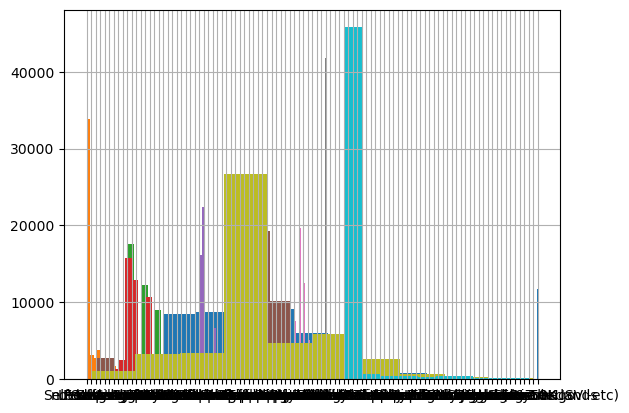

In [54]:
# let's start by assessing things generally by doing histograms of every column except for the 'gender' column which is clearly an unbalanced binary
figure, ax = plt.plot()
for col in df.columns:
    if col != 'gender':
        df[col].hist()
